In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("PS_20174392719_1491204439457_log.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
data1=data.copy()

In [4]:
data1.drop(['isFlaggedFraud','nameOrig','nameDest'], inplace=True, axis=1) 

In [5]:
data1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [8]:
#fraud1 = data1[data1["isFraud"] == 1]
#legit1 = data1[data1["isFraud"] == 0]

In [6]:
data1 = pd.get_dummies(data1,prefix=['type'])

In [7]:
pd.DataFrame.head(data1)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [8]:
from sklearn.preprocessing import StandardScaler
independent_scalar=StandardScaler()
data1[['step','amount', 'oldbalanceOrg','newbalanceOrig', 'oldbalanceDest','newbalanceDest']]= independent_scalar.fit_transform(data1[['step','amount', 'oldbalanceOrg','newbalanceOrig', 'oldbalanceDest','newbalanceDest']])
data1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.703042,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0,0,0,1,0
1,-1.703042,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0,0,0,1,0
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,0,0,0,0,1
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,0,1,0,0,0
4,-1.703042,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0,0,0,1,0


In [9]:
data1.drop('isFraud', inplace=True, axis=1)

In [12]:
#
data2=data1.copy()

In [10]:
X=data1.copy()
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-1.703042,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0,0,1,0
1,-1.703042,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0,0,1,0
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,0,0,0,0,1
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,0,1,0,0,0
4,-1.703042,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0,0,1,0


In [11]:
Y= data.isFraud
Y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [23]:
#
data2.columns
data2.shape
data3=data2[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]

In [29]:
#
scalar = StandardScaler()
X_scaled = scalar.fit_transform(data3)

In [30]:
#
X_scaled

array([[-1.70304158e+00, -2.81559923e-01, -2.29810037e-01,
        -2.37621696e-01, -3.23813895e-01, -3.33411405e-01],
       [-1.70304158e+00, -2.94767262e-01, -2.81359380e-01,
        -2.85812295e-01, -3.23813895e-01, -3.33411405e-01],
       [-1.70304158e+00, -2.97554804e-01, -2.88653782e-01,
        -2.92441707e-01, -3.23813895e-01, -3.33411405e-01],
       ...,
       [ 3.51012348e+00,  1.01539526e+01,  1.89649113e+00,
        -2.92441707e-01, -3.03665258e-01,  1.40302700e+00],
       [ 3.51012348e+00,  1.10976490e+00,  5.58104668e-03,
        -2.92441707e-01, -3.23813895e-01, -3.33411405e-01],
       [ 3.51012348e+00,  1.10976490e+00,  5.58104668e-03,
        -2.92441707e-01,  1.59138312e+00,  1.66981230e+00]])

In [20]:
#
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
#
#Checking the variance
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = data3.columns

#let's check the values
vif

,vif,Features
0,1.002398,step
1,3.709320,amount
2,430.079938,oldbalanceOrg
3,431.127244,newbalanceOrig
4,65.076535,oldbalanceDest
5,74.981695,newbalanceDest


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42,stratify=Y) 

In [14]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(5090096, 11)
(1272524, 11)
(5090096,)
(1272524,)


In [15]:
y_train.value_counts()

0    5083526
1       6570
Name: isFraud, dtype: int64

In [16]:
y_test.value_counts()

0    1270881
1       1643
Name: isFraud, dtype: int64

In [23]:
#y_test

# Logistic Regression Model

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\naiko\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
y_pred = model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9992149460442397

In [36]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1270825      56]
 [    943     700]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.93      0.43      0.58      1643

   micro avg       1.00      1.00      1.00   1272524
   macro avg       0.96      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



In [40]:
#generate_model_report(y_test,y_pred)

# Naive Bayes Model

In [25]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [26]:
model.fit(X_train,y_train)

GaussianNB()

In [28]:
y_pred = model.predict(X_test)

print (accuracy_score(y_test, y_pred))

0.566155923188875


In [29]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[718804 552077]
 [     0   1643]]
              precision    recall  f1-score   support

           0       1.00      0.57      0.72   1270881
           1       0.00      1.00      0.01      1643

    accuracy                           0.57   1272524
   macro avg       0.50      0.78      0.36   1272524
weighted avg       1.00      0.57      0.72   1272524



# Random Forest Model

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, roc_auc_score

In [18]:
model = RandomForestClassifier(n_estimators = 25, # number of trees
                               random_state = 1) # all the columns 
#class_weight = "balanced" 

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=1)

In [19]:
y_predict = model.predict(X_test)

print (accuracy_score(y_test, y_predict))

0.9996927366399376


In [21]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[1270839      42]
 [    349    1294]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.97      0.79      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



In [20]:
auc = roc_auc_score(y_test, y_predict)
auc

0.8937753202170823

In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)

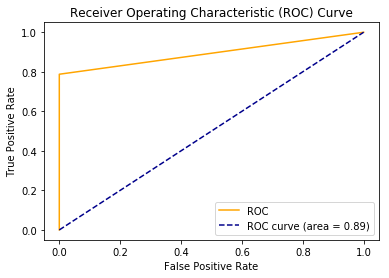

In [23]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# XG Boosting Model 

In [17]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, roc_auc_score

In [18]:
model = XGBClassifier()

In [20]:
model.fit(X_train, y_train)

[20:08:21] WARNING: src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier()

In [21]:
y_predict = model.predict(X_test)

print (accuracy_score(y_test, y_predict))

0.9995968641848798


In [22]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[1270862      19]
 [    494    1149]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      0.70      0.82      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.85      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



In [23]:
auc = roc_auc_score(y_test, y_predict)
auc

0.8496577713708469

# Oversampling Technique

# SMOTE

In [2]:
#from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [19]:
smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm=smote.fit_sample(X_train, y_train)

In [20]:
y_sm.value_counts()

1    5083526
0    5083526
Name: isFraud, dtype: int64

In [24]:
model = LogisticRegression()
model.fit(X_sm, y_sm)

C:\Users\naiko\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9489314150460031

In [27]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1205954   64927]
 [     59    1584]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270881
           1       0.02      0.96      0.05      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.96      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524



In [ ]:
#more false positive low precision and low recallscore the model is not good as its showing more legit customers as fraud

# Traditional approach Over Sampling and Under Sampling

Undersampling Technique of Copies

In [17]:
from imblearn.under_sampling import NearMiss

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [20]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_res,y_res=nm.fit_sample(X_train, y_train)

In [44]:
X_res.shape,y_res.shape

((13140, 11), (13140,))

In [45]:
y_res.value_counts()

1    6570
0    6570
Name: isFraud, dtype: int64

In [46]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_res, y_res, test_size = 0.20, stratify=y_res, random_state = 42 ) 

In [47]:
print (X_train1.shape)
print (X_test1.shape)
print (y_train1.shape)
print (y_test1.shape)

(10512, 11)
(2628, 11)
(10512,)
(2628,)


In [48]:
model = LogisticRegression()
model.fit(X_train1,y_train1)

LogisticRegression()

In [49]:
X_test.shape

(1272524, 11)

In [50]:
y_res.shape,X_res.shape

((13140,), (13140, 11))

In [51]:
y_pred = model.predict(X_test1)

In [52]:
accuracy = accuracy_score(y_test1,y_pred)
accuracy

0.9147640791476408

In [53]:
print(confusion_matrix(y_test1,y_pred))
print(classification_report(y_test1,y_pred))

[[1271   43]
 [ 181 1133]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1314
           1       0.96      0.86      0.91      1314

    accuracy                           0.91      2628
   macro avg       0.92      0.91      0.91      2628
weighted avg       0.92      0.91      0.91      2628



Oversampling Technique of creating copies

In [54]:
from imblearn.over_sampling import RandomOverSampler

In [56]:
os =  RandomOverSampler(sampling_strategy = 1)

In [57]:
X_train.shape, y_train.shape

((5090096, 11), (5090096,))

In [58]:
X_train_res, y_train_res = os.fit_sample(X_train, y_train)

In [59]:
X_train_res.shape,y_train_res.shape

((10167052, 11), (10167052,))

In [60]:
y_train_res.value_counts()

1    5083526
0    5083526
Name: isFraud, dtype: int64

In [61]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

C:\Users\naiko\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [62]:
y_pred = model.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9493872021274254

In [64]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1206539   64342]
 [     64    1579]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1270881
           1       0.02      0.96      0.05      1643

    accuracy                           0.95   1272524
   macro avg       0.51      0.96      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524

